In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
image_path = r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data\train\radiology\images'

caption=r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data\train\radiology\captions.txt'

In [4]:
df = pd.read_table(caption, header=None, names=['image_name', 'caption'])
print(df.head())

   image_name                                            caption
0  ROCO_00002   Computed tomography scan in axial view showin...
1  ROCO_00003   Bacterial contamination occurred after comple...
2  ROCO_00004   The patient had residual paralysis of the han...
3  ROCO_00005      Panoramic radiograph after immediate loading.
4  ROCO_00007   Plain abdomen x-ray: Multiple air levels at t...


In [5]:
df.describe()

,image_name,caption
count,65450,65450
unique,65450,64772
top,ROCO_81823,Initial panoramic radiograph.
freq,1,19


In [6]:
df['caption_length']=df['caption'].str.len()

In [7]:
df.head()

,image_name,caption,caption_length
0,ROCO_00002,Computed tomography scan in axial view showin...,88
1,ROCO_00003,Bacterial contamination occurred after comple...,142
2,ROCO_00004,The patient had residual paralysis of the han...,320
3,ROCO_00005,Panoramic radiograph after immediate loading.,46
4,ROCO_00007,Plain abdomen x-ray: Multiple air levels at t...,124


In [8]:
print(df['caption_length'].describe())

count    65450.000000
mean       138.963453
std        104.237943
min          3.000000
25%         73.000000
50%        114.000000
75%        175.000000
max       2855.000000
Name: caption_length, dtype: float64


In [9]:
dlink_url = r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data\train\radiology\dlinks.txt'
dlink = pd.read_table(dlink_url, header=None, names=['image_id', 'dlink', 'image'])
print(dlink)

         image_id                                              dlink  \
0      ROCO_00002  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
1      ROCO_00003  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
2      ROCO_00004  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
3      ROCO_00005  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
4      ROCO_00007  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
...           ...                                                ...   
65445  ROCO_81819  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65446  ROCO_81820  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65447  ROCO_81821  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65448  ROCO_81822  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65449  ROCO_81823  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   

                                    image  
0                     AMHSR-4-14-g002.jpg  
1                  IJD2009-150251.001.jpg  
2  

In [10]:
dlink.describe()

,image_id,dlink,image
count,65450,65450,65450
unique,65450,37396,60990
top,ROCO_81823,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,gr1.jpg
freq,1,37,1444


In [11]:
# Define paths for each split (train, test, validation) and categories (radiology, non-radiology)
base_dir = r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data'

# Define the splits and categories
splits = ['train', 'test', 'validation']
categories = ['radiology', 'non-radiology']

# Initialize an empty list to store the data
data = []

# Loop through each split and category to read captions
for split in splits:
    for category in categories:
        # Define paths for images and captions.txt
        category_dir = os.path.join(base_dir, split, category)
        captions_file = os.path.join(category_dir, 'captions.txt')
        
        # Read the captions file if it exists
        if os.path.exists(captions_file):
            with open(captions_file, 'r', encoding='utf-8', errors='ignore') as file:
                # Read each line in the captions file
                for line in file:
                    image_id = line[:12]    # Assuming the first 12 characters are the image ID
                    caption = line[12:].strip()  # The rest of the line is the caption text
                    label = category  # Set label as 'radiology' or 'non-radiology'
                    
                    # Append to data list with image ID, caption, label, and split type
                    data.append([image_id, caption, label, split])

# Create a DataFrame with the collected data
df = pd.DataFrame(data, columns=['image_id', 'caption', 'label', 'split'])

# Display the first few rows of the DataFrame to verify
df


,image_id,caption,label,split
0,ROCO_00002\t,Computed tomography scan in axial view showing...,radiology,train
1,ROCO_00003\t,Bacterial contamination occurred after complet...,radiology,train
2,ROCO_00004\t,The patient had residual paralysis of the hand...,radiology,train
3,ROCO_00005\t,Panoramic radiograph after immediate loading.,radiology,train
4,ROCO_00007\t,Plain abdomen x-ray: Multiple air levels at th...,radiology,train
...,...,...,...,...
79743,ROCO_87894\t,Scanning electron photomicrograph of blood cel...,non-radiology,validation
79744,ROCO_87904\t,SEM of Solenopsis elhawagryi sp. n. minor work...,non-radiology,validation
79745,ROCO_87918\t,Under visualization through the anterolateral ...,non-radiology,validation
79746,ROCO_87936\t,The endoscopic view demonstrated progressive d...,non-radiology,validation


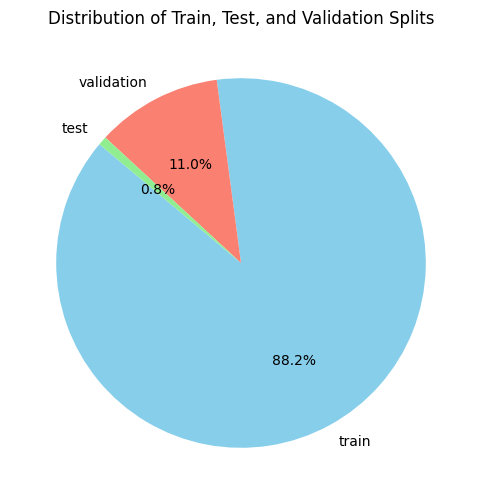

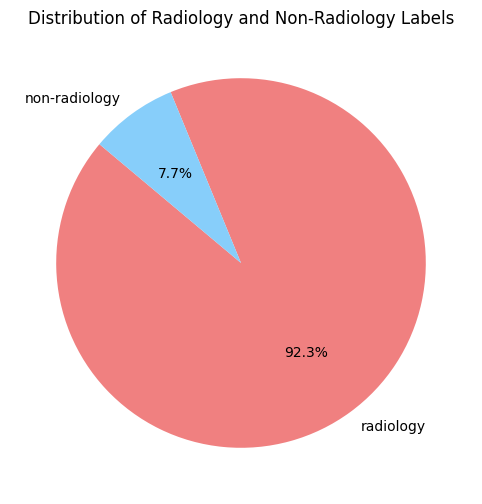

In [12]:
import matplotlib.pyplot as plt

# Pie chart for train/test/validation distribution
split_counts = df['split'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(split_counts, labels=split_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title("Distribution of Train, Test, and Validation Splits")
plt.show()

# Pie chart for radiology and non-radiology distribution
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title("Distribution of Radiology and Non-Radiology Labels")
plt.show()


## ANALYSIS OF DATA

In [13]:
df['caption_length'] = df['caption'].str.len()

<Axes: xlabel='caption_length', ylabel='Count'>

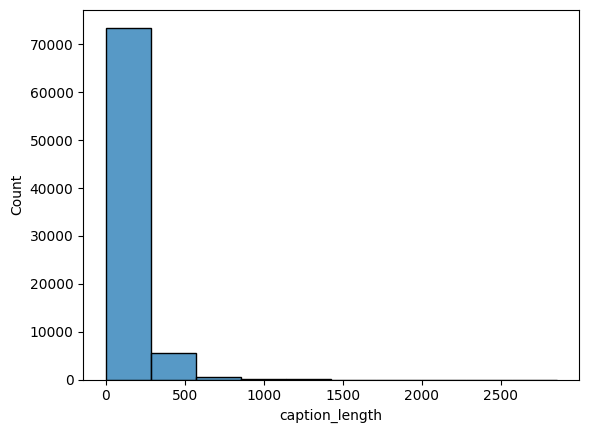

In [14]:
sns.histplot(df['caption_length'],bins=10)

In [15]:
from wordcloud import WordCloud

In [16]:
all_captions = ' '.join(df['caption'])

In [17]:
wordcloud = WordCloud(width=800, height=400, max_words=20).generate(all_captions)

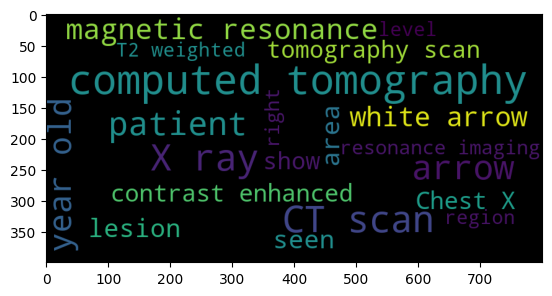

In [18]:
plt.imshow(wordcloud)

In [19]:
from collections import Counter
import re

In [20]:
words = re.findall(r'\w+', all_captions.lower())
# frequency of each word
word_counts = Counter(words)
# Display the most common words
print(word_counts.most_common(5))

[('the', 120433), ('of', 77601), ('and', 36235), ('a', 33406), ('in', 31768)]


In [21]:
top_words=word_counts.most_common(10)

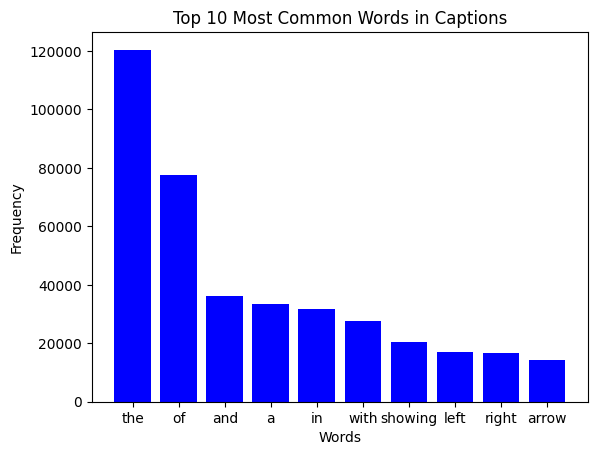

In [22]:
words, counts = zip(*top_words)
plt.bar(words, counts, color='blue')
plt.title("Top 10 Most Common Words in Captions")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

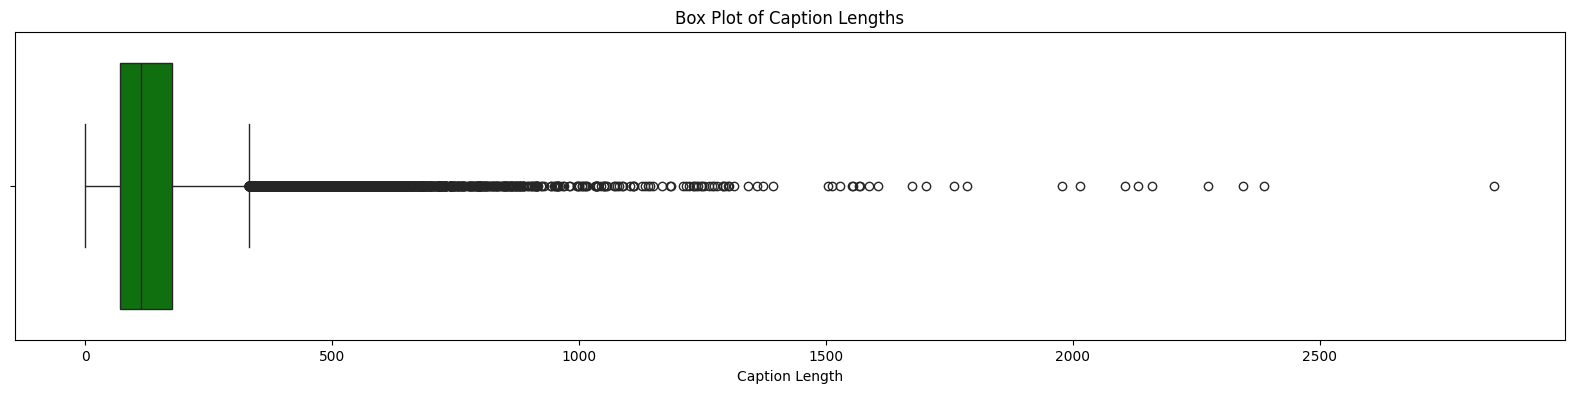

In [163]:
plt.figure(figsize=(20, 4))
sns.boxplot(x=df['caption_length'], color='green')
plt.title('Box Plot of Caption Lengths')
plt.xlabel('Caption Length')
plt.show()


In [ ]:
from textblob import TextBlob
sentiment_scores = df['caption'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.hist(sentiment_scores, bins=20, color='green', edgecolor='black')
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Distribution of Captions")
plt.show()


### IMAGE PREPROCESSING

In [23]:
import cv2

In [24]:
image_files=[f for f in os.listdir(image_path) if f.endswith(".jpg")]

In [25]:
img_path=os.path.join(image_path,image_files[21])

In [26]:
img_path

'C:\\Users\\KIIT\\Documents\\roco_dataset_extracted\\all_data\\train\\radiology\\images\\PMC1087206_pmed.0020079.g004.jpg'

In [27]:
img=cv2.imread(img_path)
img

array([[[104, 111,  44],
        [ 90,  96,  31],
        [ 91,  95,  36],
        ...,
        [101, 108,  41],
        [101, 106,  44],
        [ 97, 103,  46]],

       [[ 87,  93,  28],
        [ 71,  76,  15],
        [ 70,  73,  17],
        ...,
        [ 70,  72,  26],
        [ 65,  66,  16],
        [ 61,  63,  11]],

       [[ 89,  93,  34],
        [ 71,  74,  18],
        [ 67,  69,  17],
        ...,
        [ 88,  84,  60],
        [ 63,  61,  27],
        [ 45,  44,   0]],

       ...,

       [[ 96,  99,  43],
        [ 75,  78,  23],
        [ 69,  70,  20],
        ...,
        [ 71,  71,  23],
        [ 63,  63,  15],
        [ 53,  53,   5]],

       [[ 87,  90,  35],
        [ 70,  72,  20],
        [ 66,  66,  18],
        ...,
        [ 67,  67,  19],
        [ 61,  61,  13],
        [ 52,  52,   4]],

       [[ 65,  68,  13],
        [ 52,  53,   3],
        [ 50,  50,   4],
        ...,
        [ 55,  55,   7],
        [ 52,  52,   4],
        [ 46,  46,   0]]

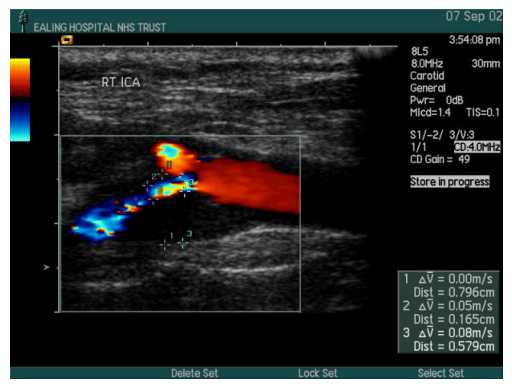

In [28]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off') 
plt.show()

In [29]:
image_rgb.shape

(485, 646, 3)

In [30]:
target_size=(224,224)
resizedimg=cv2.resize(image_rgb,target_size)

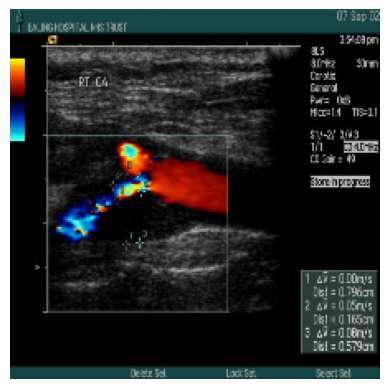

In [31]:
plt.imshow(resizedimg)
plt.axis('off')
plt.show()

In [32]:
resizedimg.shape

(224, 224, 3)

In [33]:
img_processed=image_rgb

In [34]:
img_normalized=img_processed/255

In [35]:
img_normalized

array([[[0.17254902, 0.43529412, 0.40784314],
        [0.12156863, 0.37647059, 0.35294118],
        [0.14117647, 0.37254902, 0.35686275],
        ...,
        [0.16078431, 0.42352941, 0.39607843],
        [0.17254902, 0.41568627, 0.39607843],
        [0.18039216, 0.40392157, 0.38039216]],

       [[0.10980392, 0.36470588, 0.34117647],
        [0.05882353, 0.29803922, 0.27843137],
        [0.06666667, 0.28627451, 0.2745098 ],
        ...,
        [0.10196078, 0.28235294, 0.2745098 ],
        [0.0627451 , 0.25882353, 0.25490196],
        [0.04313725, 0.24705882, 0.23921569]],

       [[0.13333333, 0.36470588, 0.34901961],
        [0.07058824, 0.29019608, 0.27843137],
        [0.06666667, 0.27058824, 0.2627451 ],
        ...,
        [0.23529412, 0.32941176, 0.34509804],
        [0.10588235, 0.23921569, 0.24705882],
        [0.        , 0.17254902, 0.17647059]],

       ...,

       [[0.16862745, 0.38823529, 0.37647059],
        [0.09019608, 0.30588235, 0.29411765],
        [0.07843137, 0

In [36]:
import tensorflow as tf

In [37]:
img=np.expand_dims(img,axis=0)

In [38]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=0.2
                                        )
it=datagen.flow(img,batch_size=1)
augmented_images=[next(it)[0] for _ in range(5)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


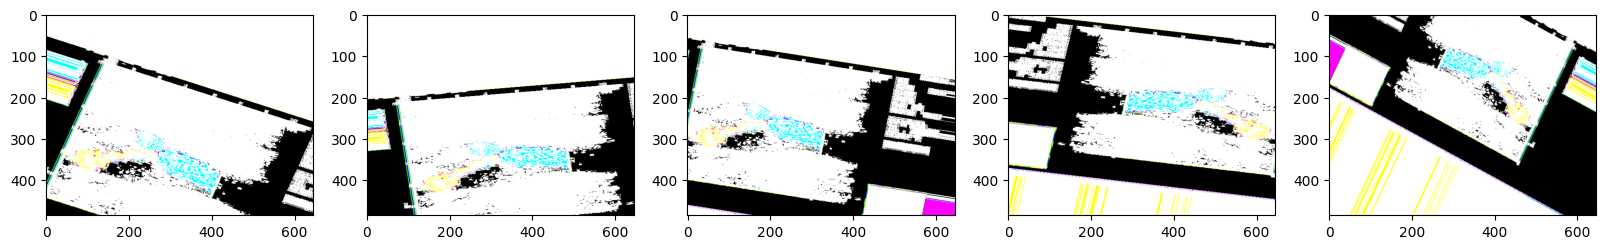

In [39]:

plt.figure(figsize=(20,5))
for i,aug_img in enumerate(augmented_images):
  plt.subplot(1,5,i+1)
  plt.imshow(aug_img)

In [40]:
image_rgb.shape

(485, 646, 3)

#### NLP PREPROCESSING TECHNIQUES

In [41]:
captions = " ".join(df['caption'])
print(captions[:500])

Computed tomography scan in axial view showing obliteration of the left maxillary sinus Bacterial contamination occurred after completion of root canal treatment in the tooth, which remained with a temporary filling for 15 month. The patient had residual paralysis of the hand after poliomyelitis. It was necessary to stabilize the thumb with reference to the index finger. This was accomplished by placing a graft from the bone bank between the first and second metacarpals. The roentgenogram shows 


In [42]:
captions=captions.lower()

In [43]:
from nltk.corpus import stopwords



In [44]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
stop_words=set(stopwords.words('english'))

In [46]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [47]:
text_input = " ".join([word.lower() for word in captions.split() if word.lower() not in stop_words][:500])


In [48]:
print(text_input)

computed tomography scan axial view showing obliteration left maxillary sinus bacterial contamination occurred completion root canal treatment tooth, remained temporary filling 15 month. patient residual paralysis hand poliomyelitis. necessary stabilize thumb reference index finger. accomplished placing graft bone bank first second metacarpals. roentgenogram shows complete healing graft one year later. panoramic radiograph immediate loading. plain abdomen x-ray: multiple air levels mid-abdomen (arrows), radiopaque shadow, air diaphragm. 3-year-old child visual difficulties. axial flair image show supra-sellar lesion extending temporal lobes along optic tracts (arrows) moderate mass effect, compatible optic glioma. flair hyperintensity also noted left mesencephalon additional tumoral involvement showing subtrochanteric fracture porotic bone. post orthodontic treatment. root canal therapy done maxillary incisors two sequential thrombi distal segment obtuse marginal 2 (om2). example mri i

In [49]:
from textblob import TextBlob

In [50]:
TextBlob(text_input).correct()

TextBlob("computer cosmography scan animal view showing obliteration left maxillary sinus bacterial contamination occurred completion root canal treatment tooth, remained temporary filling 15 month. patient residual paralysis hand poliomyelitis. necessary stability thumb reference index finger. accomplished placing graft bone bank first second metacarpals. roentgenogram shows complete healing graft one year later. panorama radiogram immediate loading. plain abdomen x-ray: multiple air levels mid-abdomen (arrows), radiopaque shadow, air diaphragm. 3-year-old child visual difficulties. animal flair image show supra-cellar lesion extending temporal loves along optic tracts (arrows) moderate mass effect, compatible optic glioma. flair hyperintensity also noted left mesencephalon additional moral involvement showing subtrochanteric fracture poetic bone. post orthodontic treatment. root canal therapy done maxillary incisors two sequential thrombi distal segment abuse marginal 2 (om). example

#### TOKENIZATION

In [51]:
from nltk.tokenize import sent_tokenize

In [52]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [53]:
sent_tokenize(text_input)

['computed tomography scan axial view showing obliteration left maxillary sinus bacterial contamination occurred completion root canal treatment tooth, remained temporary filling 15 month.',
 'patient residual paralysis hand poliomyelitis.',
 'necessary stabilize thumb reference index finger.',
 'accomplished placing graft bone bank first second metacarpals.',
 'roentgenogram shows complete healing graft one year later.',
 'panoramic radiograph immediate loading.',
 'plain abdomen x-ray: multiple air levels mid-abdomen (arrows), radiopaque shadow, air diaphragm.',
 '3-year-old child visual difficulties.',
 'axial flair image show supra-sellar lesion extending temporal lobes along optic tracts (arrows) moderate mass effect, compatible optic glioma.',
 'flair hyperintensity also noted left mesencephalon additional tumoral involvement showing subtrochanteric fracture porotic bone.',
 'post orthodontic treatment.',
 'root canal therapy done maxillary incisors two sequential thrombi distal 

In [54]:
from nltk.tokenize import wordpunct_tokenize

In [55]:
wordpunct_tokenize(text_input)

['computed',
 'tomography',
 'scan',
 'axial',
 'view',
 'showing',
 'obliteration',
 'left',
 'maxillary',
 'sinus',
 'bacterial',
 'contamination',
 'occurred',
 'completion',
 'root',
 'canal',
 'treatment',
 'tooth',
 ',',
 'remained',
 'temporary',
 'filling',
 '15',
 'month',
 '.',
 'patient',
 'residual',
 'paralysis',
 'hand',
 'poliomyelitis',
 '.',
 'necessary',
 'stabilize',
 'thumb',
 'reference',
 'index',
 'finger',
 '.',
 'accomplished',
 'placing',
 'graft',
 'bone',
 'bank',
 'first',
 'second',
 'metacarpals',
 '.',
 'roentgenogram',
 'shows',
 'complete',
 'healing',
 'graft',
 'one',
 'year',
 'later',
 '.',
 'panoramic',
 'radiograph',
 'immediate',
 'loading',
 '.',
 'plain',
 'abdomen',
 'x',
 '-',
 'ray',
 ':',
 'multiple',
 'air',
 'levels',
 'mid',
 '-',
 'abdomen',
 '(',
 'arrows',
 '),',
 'radiopaque',
 'shadow',
 ',',
 'air',
 'diaphragm',
 '.',
 '3',
 '-',
 'year',
 '-',
 'old',
 'child',
 'visual',
 'difficulties',
 '.',
 'axial',
 'flair',
 'image',
 'sh

In [56]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
tokenizer.tokenize(text_input)

['computed',
 'tomography',
 'scan',
 'axial',
 'view',
 'showing',
 'obliteration',
 'left',
 'maxillary',
 'sinus',
 'bacterial',
 'contamination',
 'occurred',
 'completion',
 'root',
 'canal',
 'treatment',
 'tooth',
 ',',
 'remained',
 'temporary',
 'filling',
 '15',
 'month.',
 'patient',
 'residual',
 'paralysis',
 'hand',
 'poliomyelitis.',
 'necessary',
 'stabilize',
 'thumb',
 'reference',
 'index',
 'finger.',
 'accomplished',
 'placing',
 'graft',
 'bone',
 'bank',
 'first',
 'second',
 'metacarpals.',
 'roentgenogram',
 'shows',
 'complete',
 'healing',
 'graft',
 'one',
 'year',
 'later.',
 'panoramic',
 'radiograph',
 'immediate',
 'loading.',
 'plain',
 'abdomen',
 'x-ray',
 ':',
 'multiple',
 'air',
 'levels',
 'mid-abdomen',
 '(',
 'arrows',
 ')',
 ',',
 'radiopaque',
 'shadow',
 ',',
 'air',
 'diaphragm.',
 '3-year-old',
 'child',
 'visual',
 'difficulties.',
 'axial',
 'flair',
 'image',
 'show',
 'supra-sellar',
 'lesion',
 'extending',
 'temporal',
 'lobes',
 'alo

### STEMMING

In [57]:
words=["eating","eats","eaten","writing","writes","programming"]

In [58]:
from nltk.stem import PorterStemmer

In [59]:
stemming=PorterStemmer()

In [60]:
for word in words:
  print(word+"---"+stemming.stem(word))

eating---eat
eats---eat
eaten---eaten
writing---write
writes---write
programming---program


In [61]:
stemming.stem("congratulations")

'congratul'

### REGEX STEMMER

In [62]:
from nltk.stem import RegexpStemmer

In [63]:
reg_stemmer=RegexpStemmer("ing$|e$|s$|able$")

In [64]:
reg_stemmer.stem("eating")

'eat'

In [65]:
reg_stemmer.stem("trains")

'train'

In [66]:
reg_stemmer.stem("ingeating")

'ingeat'

## SnowBallStemmer

In [67]:
from nltk.stem import SnowballStemmer

In [68]:
snowballstemmer=SnowballStemmer('english')

In [69]:
for word in words:
  print(word+"---"+snowballstemmer.stem(word))

eating---eat
eats---eat
eaten---eaten
writing---write
writes---write
programming---program


In [70]:
stemming.stem("sportingly"),snowballstemmer.stem("sportingly")

('sportingli', 'sport')

### LEMMATIZATION


In [79]:
from nltk.stem import WordNetLemmatizer
import nltk

In [80]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
lemmatizer=WordNetLemmatizer()

In [82]:
'''
Noun-n
verb-v
adjective-a
adverb-r
'''

'\nNoun-n\nverb-v\nadjective-a\nadverb-r\n'

In [83]:
lemmatizer.lemmatize("corpora",pos="n")

'corpus'

In [84]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## NER NAMED ENTITY RECOGNITION

In [85]:
text = "John is planning to visit the Natural History Museum in New York next weekend. He wants to see the dinosaur exhibit, which he heard is amazing. After that, he might visit the Empire State Building and grab dinner at a popular restaurant nearby."